<a href="https://colab.research.google.com/github/TheRedPill-exe/Proyecto_fundamentos_basicos_de_python/blob/master/parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install sodapy

### Pasando el código de la primera sección a colab
Módulo API

In [6]:
import pandas as pd
from sodapy import Socrata

def get_api_client():
    """
    Creates and returns a Socrata API client.
    """
    return Socrata("www.datos.gov.co", None)

def build_query(department):
    """
    Constructs the SoQL query to filter data by department.
    """
    return {"$where": f"departamento_nom='{department.upper()}'"}

def fetch_raw_data(client, query_params, record_limit):
    """
    Fetches raw data from the API using the given client, query parameters, and record limit.
    """
    try:
        return client.get("gt2j-8ykr", limit=record_limit, **query_params)
    except Exception as e:
        print(f"❌ Error fetching data from API: {e}")
        return []

def process_data(results):
    """
    Processes the raw API response into a structured Pandas DataFrame with only required columns.
    """
    if not results:
        print("⚠ No data returned from the API.")
        return []

    df = pd.DataFrame.from_records(results)

    # Define required columns
    required_columns = [
        "ciudad_municipio_nom",
        "departamento_nom",
        "edad",
        "fuente_tipo_contagio",
        "estado",
    ]

    # Add "pais_viajo_1_nom" if missing
    if "pais_viajo_1_nom" not in df.columns:
        df["pais_viajo_1_nom"] = "N/A"

    required_columns.append("pais_viajo_1_nom")

    # Keep only the columns that are available
    df = df[[col for col in required_columns if col in df.columns]]

    return df.to_dict(orient="records")

def fetch_data(department, record_limit):
    """
    Orchestrates the data fetching process from API to structured dictionary output.
    """
    client = get_api_client()
    query_params = build_query(department)
    raw_data = fetch_raw_data(client, query_params, record_limit)
    return process_data(raw_data)

Módulo UI

In [7]:
def get_user_input():
    """
    Asks the user for the department and the number of records to retrieve.
    """
    department = input("Enter the department name: ")

    while True:
        try:
            record_limit = int(input("Enter the number of records to retrieve: "))
            if record_limit > 0:
                break
            else:
                print("The number of records must be greater than 0.")
        except ValueError:
            print("Please enter a valid number.")

    return department, record_limit


def display_results(data):
    """
    Displays the retrieved data in a formatted table.
    """
    if not data:
        print("No data found for the given query.")
        return

    print("\nQuery Results:\n")
    print(f"{'City':<20} {'Department':<15} {'Age':<5} {'Type':<20} {'Status':<15} ")
    print("-" * 75)

    for record in data:
        print(f"{record.get('ciudad_municipio_nom', 'N/A'):<20} "
              f"{record.get('departamento_nom', 'N/A'):<15} "
              f"{record.get('edad', 'N/A'):<5} "
              f"{record.get('fuente_tipo_contagio', 'N/A'):<20} "
              f"{record.get('estado', 'N/A'):<15} ")

Módulo principal (anterior)

In [ ]:
def main():
    #callig the function get_user_input
    department, record_limit = get_user_input()
    #calling the function fetch_data
    data = fetch_data(department, record_limit)
    #calling the function display_results
    display_results(data)



if __name__ == "__main__":
    main()

Enter the department name: risaralda
Enter the number of records to retrieve: 20



Query Results:

City                 Department      Age   Type                 Status          
---------------------------------------------------------------------------
BELEN DE UMBRIA      RISARALDA       81    Comunitaria          Leve            
SANTA ROSA DE CABAL  RISARALDA       64    Comunitaria          Leve            
SANTA ROSA DE CABAL  RISARALDA       40    Comunitaria          Leve            
PEREIRA              RISARALDA       20    Comunitaria          Leve            
SANTA ROSA DE CABAL  RISARALDA       20    Comunitaria          Leve            
PEREIRA              RISARALDA       49    Comunitaria          Leve            
DOSQUEBRADAS         RISARALDA       34    Comunitaria          Leve            
PEREIRA              RISARALDA       17    Comunitaria          Leve            
PEREIRA              RISARALDA       46    Comunitaria          Leve            
PEREIRA              RISARALDA       47    Comunitaria          Leve            
DOSQUEBRADAS    

### Segunda parte
Aplicando los procedimientos de las paginas 138 hasta la 141 del libro.

In [8]:
def explore_data(df):
    """
    Imprime información exploratoria del DataFrame:
    - Número de filas y columnas
    - Nombres y tipos de datos de las columnas
    - Columnas con valores faltantes, cantidad de filas afectadas e índices de ejemplo
    - Estadísticas generales (info() y describe())
    """
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Column Names:", df.columns.values.tolist())
    print("Column Data Types:\n", df.dtypes)

    print("Columns with Missing Values:", df.columns[df.isnull().any()].tolist())
    missing_indices = pd.isnull(df).any(axis=1).to_numpy().nonzero()[0].tolist()
    print("Number of rows with Missing Values:", len(missing_indices))
    print("Sample Indices with missing data:", missing_indices[:5])

    print("General Stats:")
    df.info()  # Imprime información general del DataFrame
    print("Summary Stats:")
    print(df.describe())


In [9]:
def cleanup_column_names(df, rename_dict={}, do_inplace=True):
    """
    Renombra las columnas de un DataFrame.
    Si no se proporciona un diccionario de renombre (rename_dict),
    convierte los nombres a snake_case (minúsculas y reemplaza espacios por '_').

    Args:
        rename_dict (dict): Diccionario con mapeo {nombre_viejo: nombre_nuevo}.
        do_inplace (bool): Si es True, modifica el DataFrame original; de lo contrario, retorna uno nuevo.

    Returns:
        Si do_inplace es False, retorna el DataFrame renombrado; en caso contrario, retorna None.
    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ', '_') for col in df.columns.values.tolist()},
                         inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict, inplace=do_inplace)


In [ ]:
# prompt: usa las funciones que acabamos de crear

def main():
    #callig the function get_user_input
    department, record_limit = get_user_input()
    #calling the function fetch_data
    data = fetch_data(department, record_limit)

    if data:
        df = pd.DataFrame(data)
        explore_data(df)
        cleanup_column_names(df) #Aplica la funcion cleanup
        print(df.head()) #Imprime las primeras filas del DataFrame
    else:
        print("No data to process.")

if __name__ == "__main__":
    main()


Enter the department name: risaralda
Enter the number of records to retrieve: 10


Number of rows: 10
Number of columns: 6
Column Names: ['ciudad_municipio_nom', 'departamento_nom', 'edad', 'fuente_tipo_contagio', 'estado', 'pais_viajo_1_nom']
Column Data Types:
 ciudad_municipio_nom    object
departamento_nom        object
edad                    object
fuente_tipo_contagio    object
estado                  object
pais_viajo_1_nom        object
dtype: object
Columns with Missing Values: []
Number of rows with Missing Values: 0
Sample Indices with missing data: []
General Stats:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ciudad_municipio_nom  10 non-null     object
 1   departamento_nom      10 non-null     object
 2   edad                  10 non-null     object
 3   fuente_tipo_contagio  10 non-null     object
 4   estado                10 non-null     object
 5   pais_viajo_1_nom      10 non-null     obj

Enter the department name: risaralda
Enter the number of records to retrieve: 40


<ipython-input-11-5f01b1046d3d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


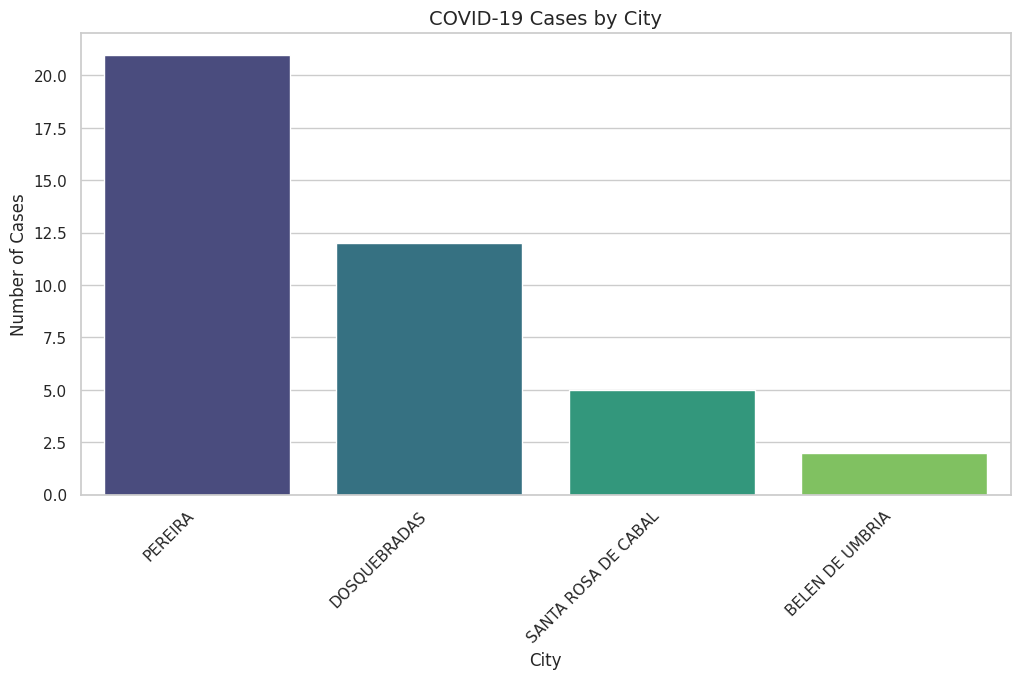

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_data():
    # Obtener datos de la función fetch_data
    department, record_limit = get_user_input()
    data = fetch_data(department, record_limit)

    if not data:
        print("No data available to plot.")
        return

    # Convertir datos a DataFrame
    df = pd.DataFrame(data)

    # Configurar el estilo de Seaborn
    sns.set_theme(style="whitegrid")

    # Crear figura y ejes
    plt.figure(figsize=(12, 6))

    # Ordenar datos por ciudad y contar casos
    city_counts = df['ciudad_municipio_nom'].value_counts()

    # Crear gráfico de barras
    sns.barplot(
        x=city_counts.index,
        y=city_counts.values,
        palette="viridis"
    )

    # Etiquetas y título
    plt.xlabel("City", fontsize=12)
    plt.ylabel("Number of Cases", fontsize=12)
    plt.title("COVID-19 Cases by City", fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Mostrar gráfico
    plt.show()

# Llamar a la función para graficar
plot_data()
